In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('train.csv')

In [111]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [112]:
df.corr()[df.corr()['SalePrice'] > 0.3]['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

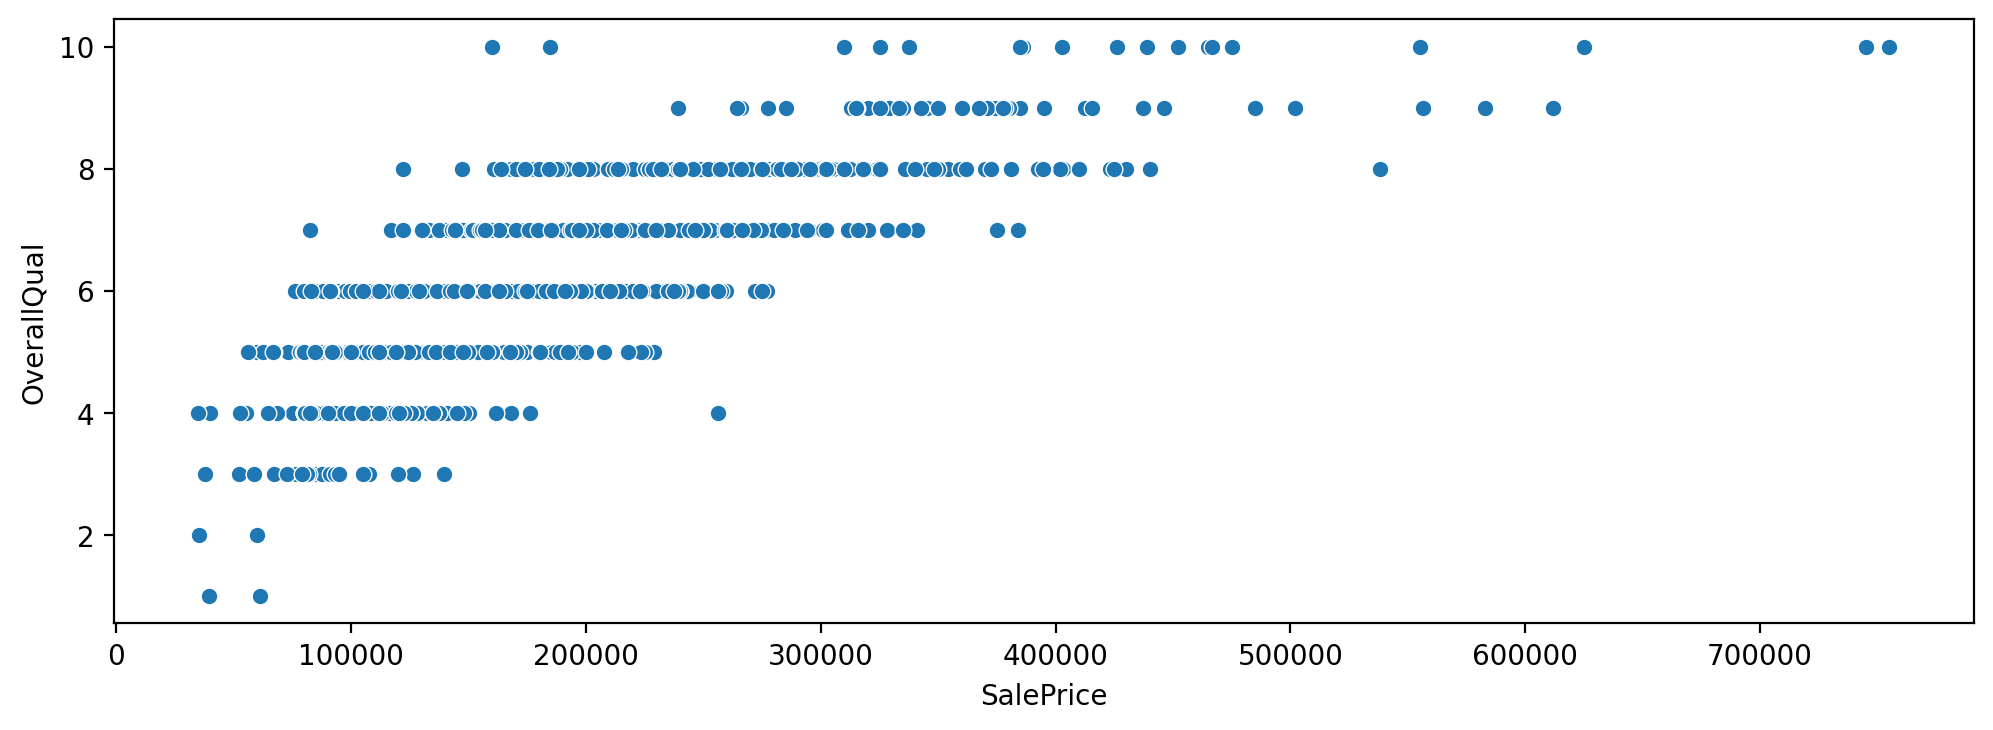

In [113]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(x='SalePrice', y='OverallQual', data=df)

In [114]:
df[df['SalePrice'] > 700000].isnull().sum().sort_values(ascending=False)  # We have dropped these 4 columns

Alley          2
MiscFeature    2
Fence          1
PoolQC         1
Id             0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

In [115]:
df[(df['SalePrice'] < 200000) & (df['OverallQual'] == 10)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [116]:
df[df.columns[df.isnull().any()]].isnull().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

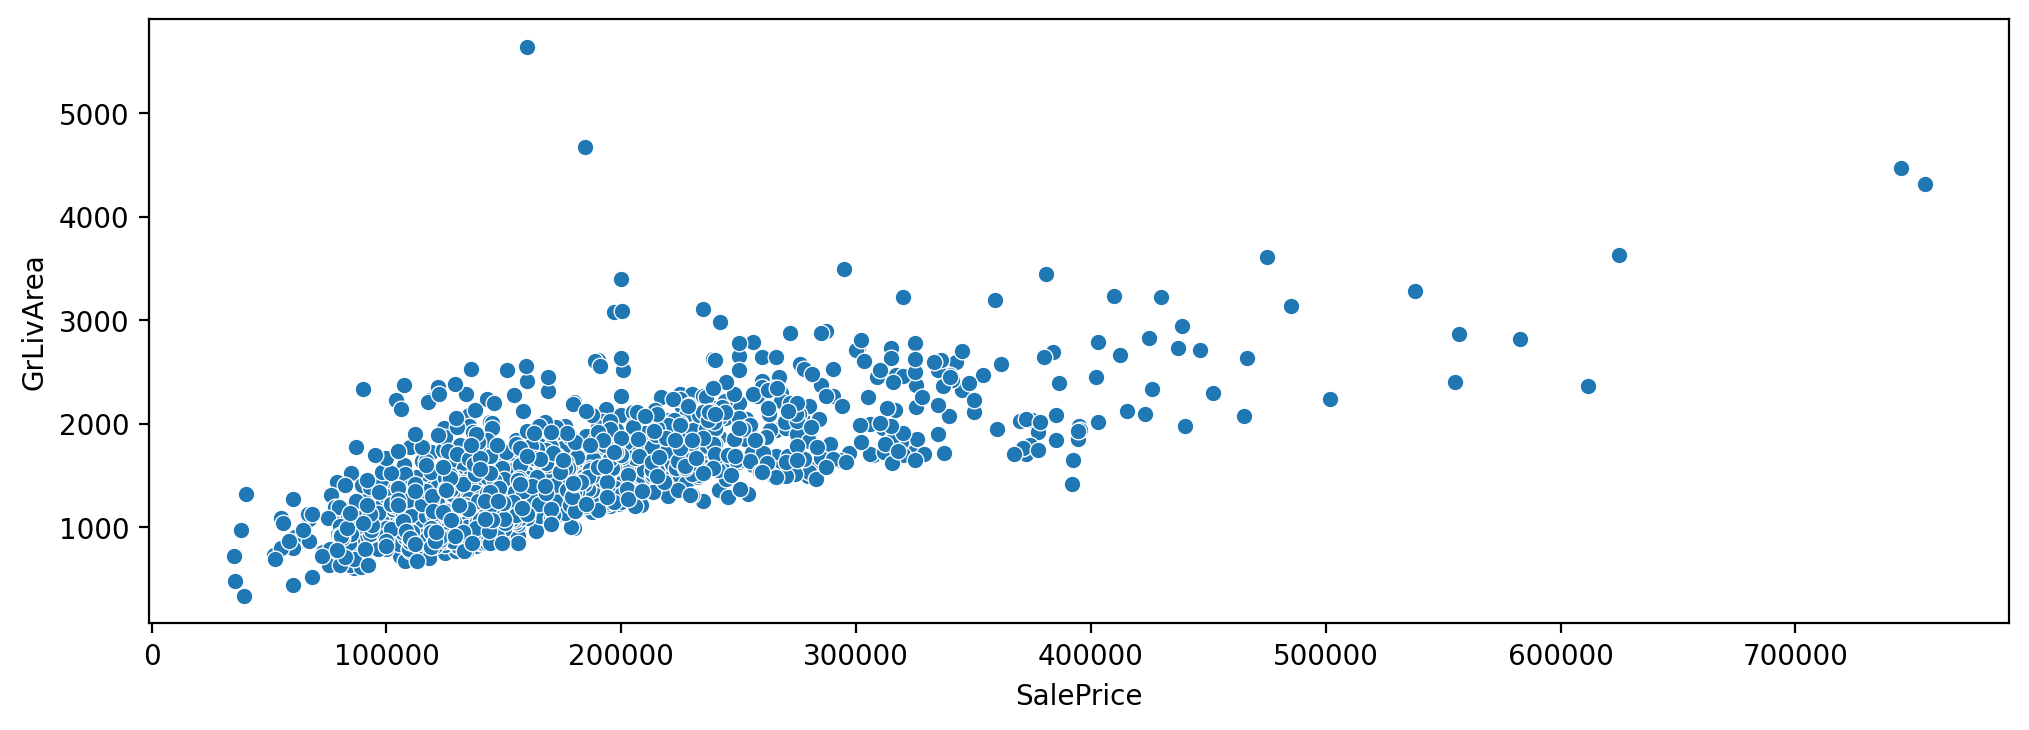

In [117]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(x='SalePrice', y='GrLivArea', data=df)

In [118]:
# We can drop the columns with more than 50% missing values
df = df.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1)
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
# Garage data is missing probably means there is no garage
GarageData = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[GarageData] = df[GarageData].fillna('None')
df['GarageYrBlt'] = df['GarageType'].fillna(0)
BasementData = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
df[BasementData] = df[BasementData].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

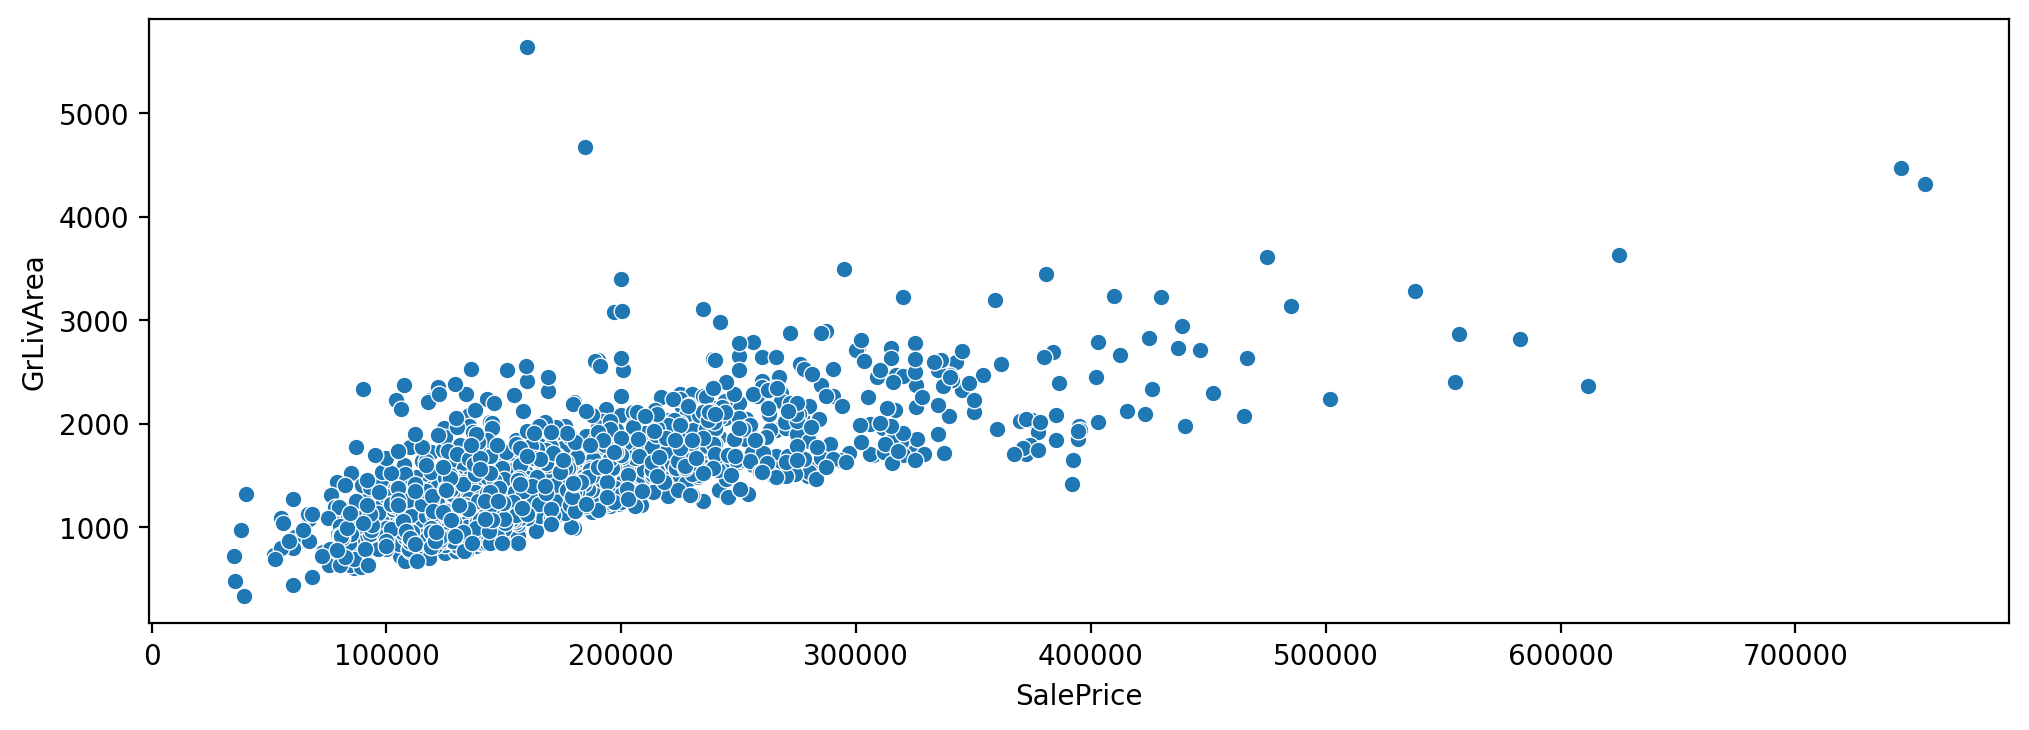

In [119]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(x='SalePrice', y='GrLivArea', data=df)

In [120]:
df.drop([523,1298], inplace=True)

In [122]:
(df['Id'] == 524).any()

False

In [124]:
(df['Id'] == 1299).any()

False

In [126]:
df.shape

(1458, 77)

In [128]:
test_df = pd.read_csv('test_no_missing.csv')

In [129]:
test_df.shape

(1459, 75)

In [130]:
df = df.drop(['Id', 'SalePrice'], axis=1)

In [131]:
df.shape

(1458, 75)

In [133]:
final_df = pd.concat([df,test_df], axis=0)

In [134]:
final_df = pd.get_dummies(final_df, drop_first=True)

In [135]:
final_df.shape

(2917, 249)

In [139]:
df_train = final_df.iloc[:1458, :]
df_test = final_df.iloc[1458:, :]

In [140]:
df_train.shape

(1458, 249)

In [141]:
df_test.shape

(1459, 249)

In [145]:
X = df_train
y = pd.read_csv('train.csv')['SalePrice'].drop([523,1298])

In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [147]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
gb_model = GradientBoostingRegressor(random_state=101)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

In [148]:
mae = mean_absolute_error(y_test, gb_preds)
mae

16091.294482396277

In [149]:
rmse = np.sqrt(mean_squared_error(y_test, gb_preds))
rmse

25344.6399869571

In [150]:
ada_model = AdaBoostRegressor(random_state=101)
ada_model.fit(X_train, y_train)
ada_preds = ada_model.predict(X_test)

In [151]:
mae = mean_absolute_error(y_test, ada_preds)
mae

23645.562813303794

In [152]:
rmse = np.sqrt(mean_squared_error(y_test, ada_preds))
rmse

34385.6922699469

In [153]:
final_gb_preds = gb_model.predict(df_test)

In [154]:
submission = pd.concat([pd.read_csv('test.csv')['Id'],pd.DataFrame(final_gb_preds)], axis=1)
submission.columns = ['Id', 'SalePrice']

In [155]:
submission.to_csv('GBsubmission2.csv', index=False)

In [156]:
final_ada_preds = ada_model.predict(df_test)

In [157]:
submission = pd.concat([pd.read_csv('test.csv')['Id'],pd.DataFrame(final_ada_preds)], axis=1)
submission.columns = ['Id', 'SalePrice']

In [158]:
submission.to_csv('ADAsubmission2.csv', index=False)